<a href="https://colab.research.google.com/github/lflorian/sp1/blob/master/0710082_Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Universidad Galileo**
##Luis Florian - Sección AN - Laboratorio No.2

## **Imports**


In [5]:
%tensorflow_version 2.x

import tensorflow as tf
#tensorflow_hub is a Library for Reusable Machine Learning Modules in TensorFlow.  
import tensorflow_hub as hub
#Leyers are going to be defined in sequence
from tensorflow.keras import Sequential
#get_file for downloading files 
from tensorflow.keras.utils import get_file
#For Residual Neural Networks on Keras
from tensorflow.keras.applications import ResNet50V2
#GlobalAveragePooling2D for pooling and Dense for Total connected leyers
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
#loading files
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#os and shutil for files and directories manage 
import os
import shutil
#numpy is Multimentional array library
import numpy as np
#graphing
import PIL.Image as Image
import matplotlib.pylab as plt

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

TensorFlow 2.x selected.


## **Library for downloading images**

In [6]:
!pip install googleimagedownloader
from googleimagedownloader.googleimagedownloader import GoogleImageDownloader

  Created wheel for requests-futures: filename=requests_futures-1.0.0-cp36-none-any.whl size=7012 sha256=ed46bf032eea16fb2b94ee19cc34b4d7e4ed30db08c105c86cdc051130ead750
  Stored in directory: /root/.cache/pip/wheels/26/d0/f5/dc4e4a37bbe55c9acf967d2bd899152412c1e49c227f5395ff
Successfully built requests-futures


## **Existing Classifier**

In [0]:
IMAGE_SIZE = (224, 224)
classifier_url ="https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4" 

## **Model**

In [0]:
classifier = Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SIZE+(3,))
])

## **Getting an image**

90112/86910 [===============================] - 0s 1us/step


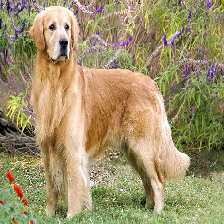

In [9]:
test_image = get_file('img.jpg','https://disenlis.com/wp-content/uploads/2019/01/Golden-Retriever-Standing1.jpg')
test_image = Image.open(test_image).resize(IMAGE_SIZE)
test_image

## **Image Adjustment**
Se divide entre 255(maximo) me quedará un número de 0-1.  El share es el tersor.

In [10]:
test_image = np.array(test_image)/255.0
test_image.shape

(224, 224, 3)

## **Image to the classifier**

newaxis adds a new axis.  I need a new axis because I only have one image.  So a send an array of only one image just to avoid mismatches, and the model could predict.

In [11]:
result = classifier.predict(test_image[np.newaxis, ...])
result.shape

(1, 1001)

## **Getting the element with the max probability**
argmax returns indices of the max element of the array in a particular axis.  I will the element with the maximum probability.

In [13]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

208

## **Images label**

In [14]:
labels_path = get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

16384/10484 [==============================================] - 0s 0us/step


## **Prediction**

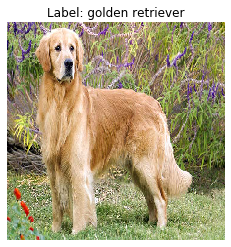

In [15]:
predicted_class_name = imagenet_labels[predicted_class]

plt.axis('off')
plt.title("Label: " + predicted_class_name, color = 'black')
plt.imshow(test_image)
plt.show()

# **TRANSFER LEARNING**

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
class_names = ['perro','caballo']
path = 'dataset/'

train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')

train_ca_dir = os.path.join(train_dir, 'perro')  
train_im_dir = os.path.join(train_dir, 'caballo')  
validation_ca_dir = os.path.join(validation_dir, 'perro') 
validation_im_dir = os.path.join(validation_dir, 'caballo')  

if os.path.exists(path):
  shutil.rmtree(path)

os.makedirs(train_ca_dir)
os.makedirs(train_im_dir)
os.makedirs(validation_ca_dir)    
os.makedirs(validation_im_dir)

In [0]:
def manage_images(src, dest_train, dest_val, image_resize=IMAGE_SIZE, val_split=0.1, prefix=''):
  total = len(os.listdir(src))
  val = np.int(total*val_split)
  count = 0
  files = os.listdir(src)

  for file_name in files:
    try:
      dest = dest_train if count >= val else dest_val
      dest_file = os.path.join(dest, prefix + file_name) 

      img = Image.open(os.path.join(src,file_name))
      img.verify()
      # reopen because verify() was called
      # If you need to load the image after using this method, you must reopen the image file.
      # https://pillow.readthedocs.io/en/3.1.x/reference/Image.html
      img = Image.open(os.path.join(src,file_name))
      #resize
      img = img.resize(image_resize, Image.ANTIALIAS)
      #move
      img.save(dest_file)  
      count+=1 
    except Exception as e:
        print('Invalid image: ',file_name,e)
        if os.path.exists(dest_file):
          os.remove(dest_file)
  return


In [0]:
img_dir = os.path.realpath('Images/')

## **Perro**

In [35]:
queries = ['perro','dog','puppy','pet','doggy']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query='perro '+query, numberImage=100)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_ca_dir, validation_ca_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=perro perro&source=lnms&tbm=isch
Error  HTTPSConnectionPool(host='www.ecured.cu', port=443): Max retries exceeded with url: /images/thumb/a/a4/Perros1.jpg/260px-Perros1.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f092a2c2fd0>: Failed to establish a new connection: [Errno 110] Connection timed out',))
Invalid image:  14.jpg cannot identify image file '/content/Images/14.jpg'
Invalid image:  41.jpg cannot write mode RGBA as JPEG
Invalid image:  72.jpg cannot identify image file '/content/Images/72.jpg'
https://www.google.co.in/search?q=perro dog&source=lnms&tbm=isch
Error  ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))
Invalid image:  46.jpg cannot identify image file '/content/Images/46.jpg'
Invalid image:  33.jpg cannot write mode RGBA as JPEG
Invalid image:  57.jpg cannot write mode RGBA as JPEG
Invalid image:  56.jpg cannot write mode RGBA as JPEG
Invalid i

## **Caballo**

In [36]:
queries = ['horse','caballo','pet','mascota','corcel']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query='caballo '+query, numberImage=100)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_im_dir, validation_im_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=caballo horse&source=lnms&tbm=isch
Error  ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))
Invalid image:  88.jpg cannot write mode RGBA as JPEG
Invalid image:  60.jpg cannot identify image file '/content/Images/60.jpg'
Invalid image:  24.jpg cannot write mode RGBA as JPEG
Invalid image:  44.jpg cannot identify image file '/content/Images/44.jpg'
Invalid image:  82.jpg cannot identify image file '/content/Images/82.jpg'
Invalid image:  54.jpg cannot write mode P as JPEG
Invalid image:  71.jpg cannot write mode RGBA as JPEG
Invalid image:  39.jpg cannot write mode RGBA as JPEG
Invalid image:  4.jpg cannot write mode RGBA as JPEG
https://www.google.co.in/search?q=caballo caballo&source=lnms&tbm=isch
Error  ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))
Invalid image:  88.jpg cannot write mode RGBA as JPEG
Invalid image:  60.jpg cannot identify image file '/content

## **Training**

In [37]:
total_train = len(os.listdir(train_ca_dir))+ len(os.listdir(train_im_dir))
total_val = len(os.listdir(validation_ca_dir))+ len(os.listdir(validation_im_dir))

print('total training Perro images:', len(os.listdir(train_ca_dir)))
print('total training Caballo images:', len(os.listdir(train_im_dir)))

print('total validation Perro America images:', len(os.listdir(validation_ca_dir)))
print('total validation Caballo images:', len(os.listdir(validation_im_dir)))
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training Perro images: 367
total training Caballo images: 402
total validation Perro America images: 45
total validation Caballo images: 50
--
Total training images: 769
Total validation images: 95


## **Using the Data**

In [39]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(train_dir,
                                                           shuffle=True,
                                                           batch_size=32,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(validation_dir,
                                                              target_size=IMAGE_SIZE,
                                                              class_mode='binary')



Found 769 images belonging to 2 classes.
Found 95 images belonging to 2 classes.


## **Testing the Classifier**

In [40]:
image_batch, labels_batch = next(train_data_gen)

result_batch = classifier.predict(image_batch)
result_batch.shape

(32, 1001)

In [41]:
predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
predicted_class_names

array(['toy poodle', 'Saluki', 'bull mastiff', 'bull mastiff',
       'bull mastiff', 'French bulldog', 'sorrel', 'horse cart',
       'Christmas stocking', 'American black bear', 'basketball', 'pug',
       'Great Pyrenees', 'Pembroke', 'Samoyed', 'scoreboard',
       'golden retriever', 'golden retriever', 'Rhodesian ridgeback',
       'Chihuahua', 'toy terrier', 'comic book', 'Yorkshire terrier',
       'Samoyed', 'comic book', 'Blenheim spaniel', 'bull mastiff',
       'golden retriever', 'golden retriever', 'Pomeranian',
       'silky terrier', 'comic book'], dtype='<U30')

In [0]:
def plot_images(img_batch, labels, predicted_labels):
  plt.figure(figsize=(12,12))
  plt.subplots_adjust(hspace=0.5)
  for i in range(15):
    plt.subplot(6,5,i+1) 
    plt.imshow(img_batch[i])
    color = "green" if predicted_labels[i] == class_names[np.int(labels[i])] else "red"
    plt.title(predicted_labels[i], color=color)
    plt.axis('off')

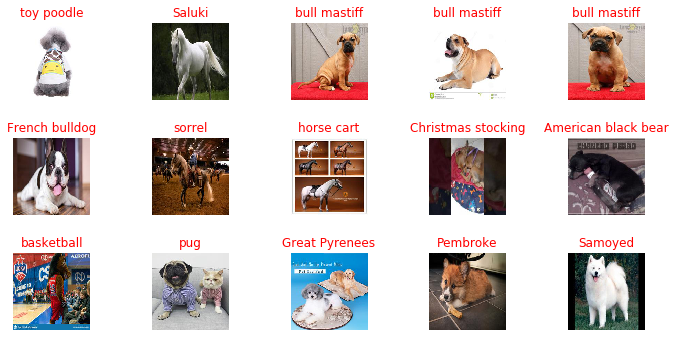

In [44]:
plot_images(image_batch, labels_batch, predicted_class_names)

## **Headless Model**



In [0]:
feature_extractor_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [0]:
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=IMAGE_SIZE+(3,))

In [47]:
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

(32, 2048)


In [0]:
feature_extractor_layer.trainable = False

## **Classification Head**

In [49]:
model = Sequential([
  feature_extractor_layer,
  Dense(1024, activation='relu'),
  Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 2048)              23564800  
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 2,099,201
Non-trainable params: 23,564,800
_________________________________________________________________


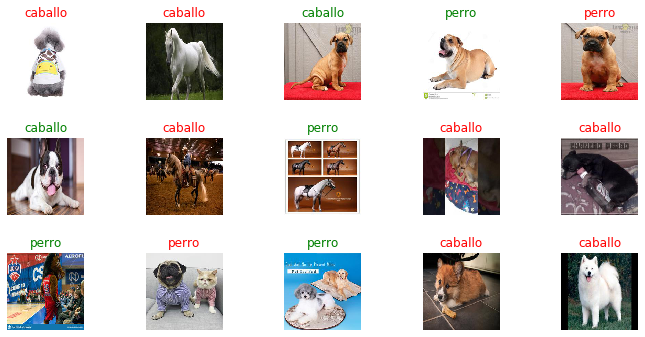

In [50]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)

## **Train Model**

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [52]:
history = model.fit(
    train_data_gen,
    epochs=5,
    steps_per_epoch=5,
    validation_data=val_data_gen
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 3 steps
Epoch 1/5
5/5 [==============================] - 38s 8s/step - loss: 1.1663 - accuracy: 0.5875 - val_loss: 0.7638 - val_accuracy: 0.7684
Epoch 2/5
5/5 [==============================] - 34s 7s/step - loss: 0.9537 - accuracy: 0.7188 - val_loss: 0.8433 - val_accuracy: 0.8000
Epoch 3/5
5/5 [==============================] - 30s 6s/step - loss: 0.5663 - accuracy: 0.7597 - val_loss: 0.4820 - val_accuracy: 0.8000
Epoch 4/5
5/5 [==============================] - 34s 7s/step - loss: 0.5736 - accuracy: 0.8000 - val_loss: 0.4743 - val_accuracy: 0.8105
Epoch 5/5
5/5 [==============================] - 34s 7s/step - loss: 0.3207 - accuracy: 0.8313 - val_loss: 0.4696 - val_accuracy: 0.7895


## **Graphs**

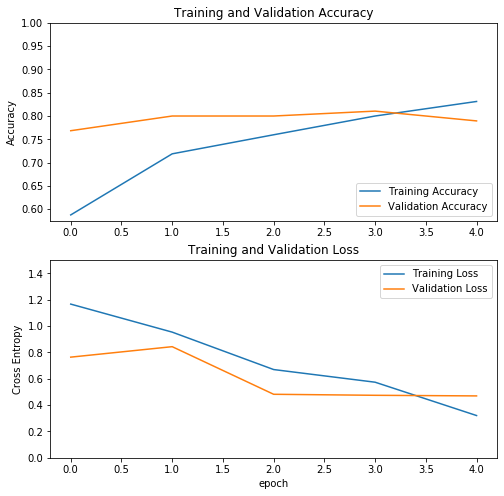

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

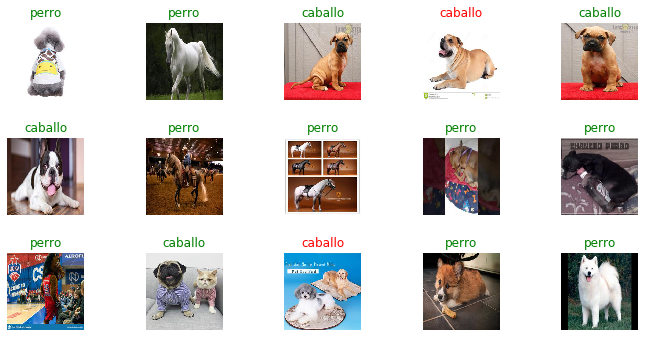

In [54]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()

plot_images(image_batch, labels_batch, predicted_class_names)

## **Aplication base model**

In [55]:
base_model = ResNet50V2(input_shape=IMAGE_SIZE+(3,),
                                               include_top=False,
                                               weights='imagenet')

94674944/94668760 [==============================] - 1s 0us/step


In [0]:
base_model.trainable = False

In [57]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [58]:
model = Sequential([
  base_model,
  GlobalAveragePooling2D(),
  Dense(1024, activation='relu'),
  Dense(1, activation='sigmoid')    
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 2,099,201
Non-trainable params: 23,564,800
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [60]:
history = model.fit(
    train_data_gen,
    epochs=5,
    steps_per_epoch=5,
    validation_data=val_data_gen
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 3 steps
Epoch 1/5
5/5 [==============================] - 43s 9s/step - loss: 1.0109 - accuracy: 0.5750 - val_loss: 0.8235 - val_accuracy: 0.7579
Epoch 2/5
5/5 [==============================] - 40s 8s/step - loss: 0.8547 - accuracy: 0.6750 - val_loss: 1.2594 - val_accuracy: 0.7368
Epoch 3/5
5/5 [==============================] - 35s 7s/step - loss: 0.6880 - accuracy: 0.7287 - val_loss: 1.3823 - val_accuracy: 0.7053
Epoch 4/5
5/5 [==============================] - 40s 8s/step - loss: 0.2771 - accuracy: 0.8625 - val_loss: 0.4920 - val_accuracy: 0.8000
Epoch 5/5
5/5 [==============================] - 35s 7s/step - loss: 0.4784 - accuracy: 0.8140 - val_loss: 0.8396 - val_accuracy: 0.7368


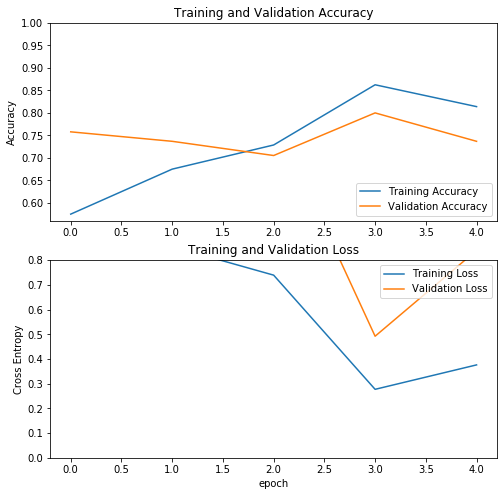

In [61]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,0.8])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

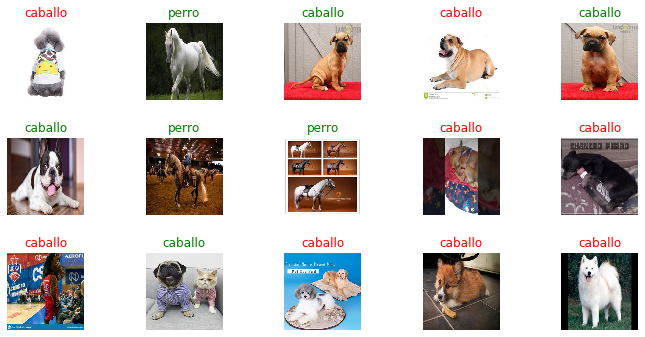

In [62]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)

## **Fine Tunning**

In [63]:
base_model.trainable = True

print("Number of layers in the base model: ", len(base_model.layers))
fine_tune_at = 160
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False


Number of layers in the base model:  190


In [64]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 16,542,721
Non-trainable params: 9,121,280
_________________________________________________________________


In [65]:
initial_epochs = 5
fine_tune_epochs = 5
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_data_gen,
                         epochs=total_epochs,
                         steps_per_epoch=5,
                         initial_epoch =  history.epoch[-1],
                         validation_data=val_data_gen)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 3 steps
Epoch 5/10
5/5 [==============================] - 52s 10s/step - loss: 0.8193 - accuracy: 0.7907 - val_loss: 2.7673 - val_accuracy: 0.5158
Epoch 6/10
5/5 [==============================] - 54s 11s/step - loss: 0.5656 - accuracy: 0.7812 - val_loss: 0.5729 - val_accuracy: 0.7684
Epoch 7/10
5/5 [==============================] - 47s 9s/step - loss: 0.6855 - accuracy: 0.6667 - val_loss: 2.9462 - val_accuracy: 0.5684
Epoch 8/10
5/5 [==============================] - 56s 11s/step - loss: 0.6008 - accuracy: 0.6938 - val_loss: 2.1561 - val_accuracy: 0.6737
Epoch 9/10
5/5 [==============================] - 53s 11s/step - loss: 0.4538 - accuracy: 0.8125 - val_loss: 2.0249 - val_accuracy: 0.7895
Epoch 10/10
5/5 [==============================] - 53s 11s/step - loss: 0.3562 - accuracy: 0.8500 - val_loss: 2.5793 - val_accuracy: 0.7895


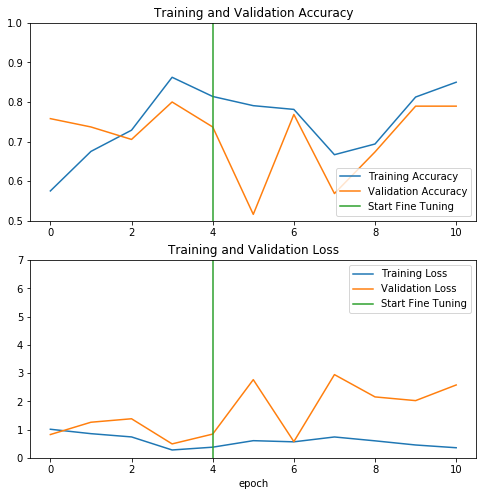

In [66]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.5, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 7.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

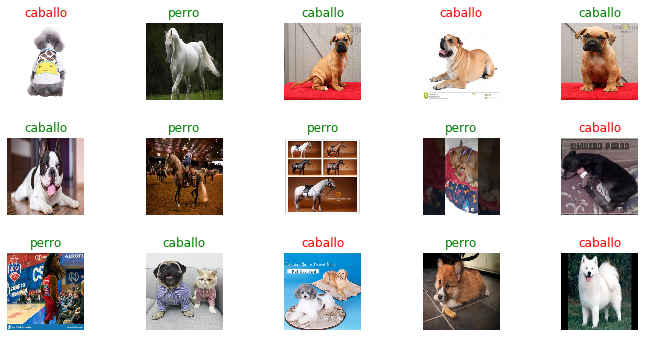

In [67]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)